## DAV Week 10 & 11
## Set 3: Heart Monitoring

### Nipun Nitin Bhattad 240911278
### PG-27

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Heart_monitoring.csv')
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

## 1.
Perform Data exploration of the attributes Blood Pressure, Cholestrol Level, Triglyceride Level, Fasting Blood Sugar, CRP Level, Homocysteine Level.

In [4]:
columns_1 = ['Blood Pressure', 'Cholesterol Level', 'Triglyceride Level', 'Fasting Blood Sugar',
            'CRP Level', 'Homocysteine Level']
df_1 = df[columns_1]

#5-number summary
df_1.describe()

,Blood Pressure,Cholesterol Level,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9981.000000,9970.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,149.757740,225.425577,250.734409,120.142213,7.472201,12.456271
std,17.572969,43.575809,87.067226,23.584011,4.340248,4.323426
min,120.000000,150.000000,100.000000,80.000000,0.003647,5.000236
25%,134.000000,187.000000,176.000000,99.000000,3.674126,8.723334
50%,150.000000,226.000000,250.000000,120.000000,7.472164,12.409395
75%,165.000000,263.000000,326.000000,141.000000,11.255592,16.140564
max,180.000000,300.000000,400.000000,160.000000,14.997087,19.999037


In [5]:
print('Missing Values: ')
df_1.isnull().sum()

Missing Values: 


Blood Pressure         19
Cholesterol Level      30
Triglyceride Level     26
Fasting Blood Sugar    22
CRP Level              26
Homocysteine Level     20
dtype: int64

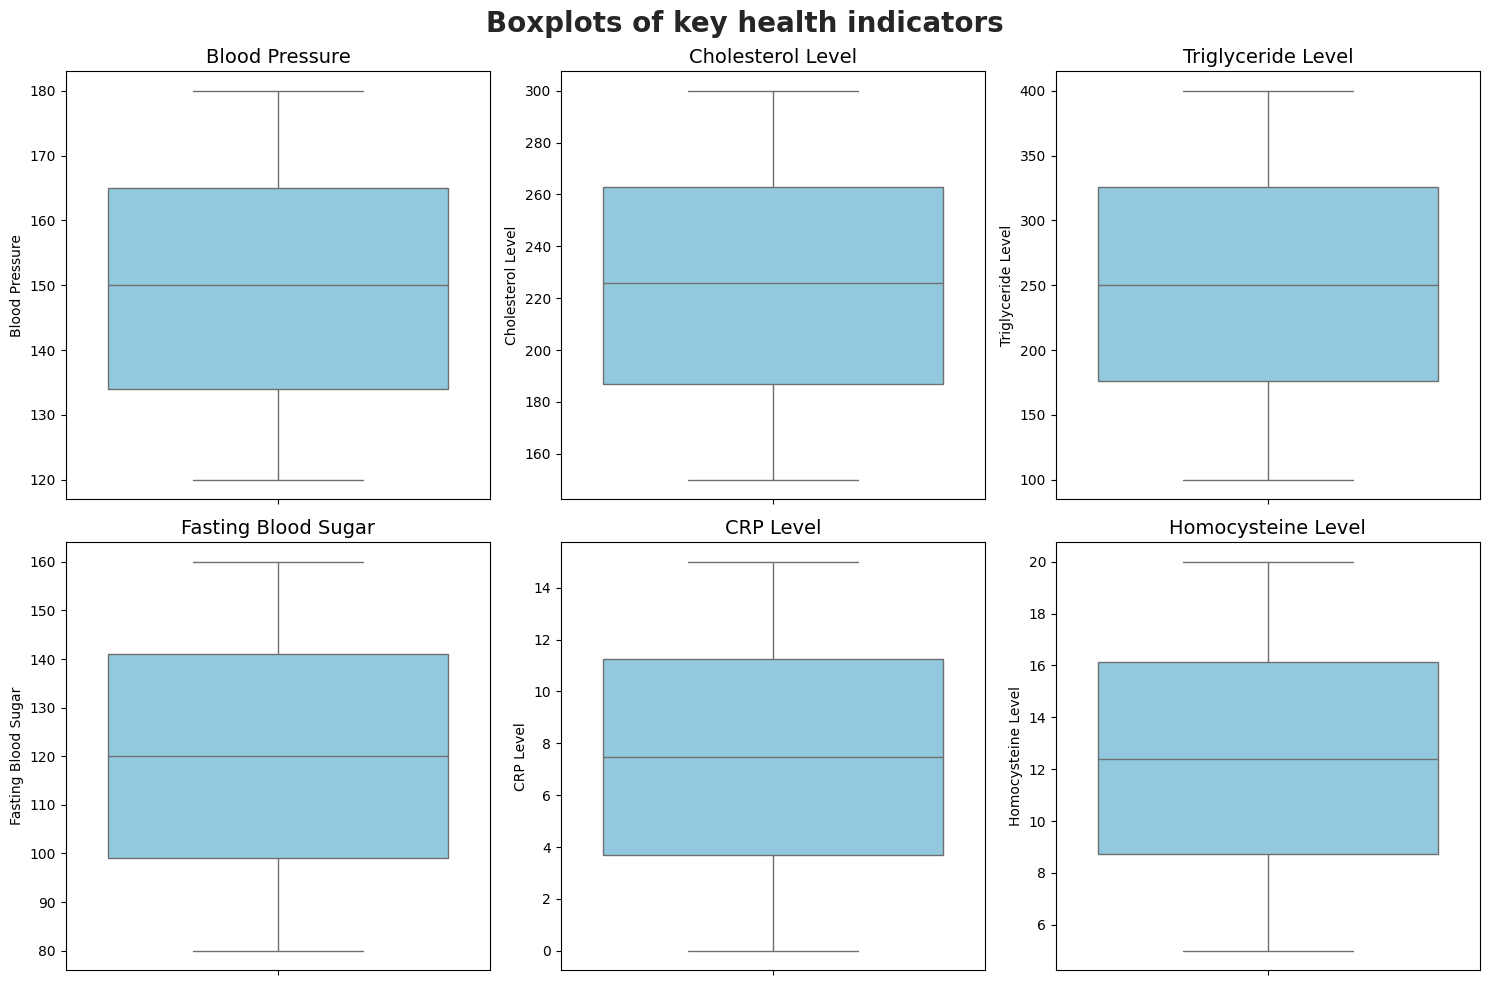

In [6]:
#Box plots of each attribute to check for distribution and outliers.
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 10))
ax = ax.flatten()
sns.set_style("darkgrid")

for i, col in enumerate(columns_1):
    sns.boxplot(df_1[col], ax=ax[i], color='skyblue', saturation=0.75)
    ax[i].set_title(col, fontsize=14)

fig.suptitle('Boxplots of key health indicators', fontsize = 20, fontweight = 'bold')
plt.tight_layout()

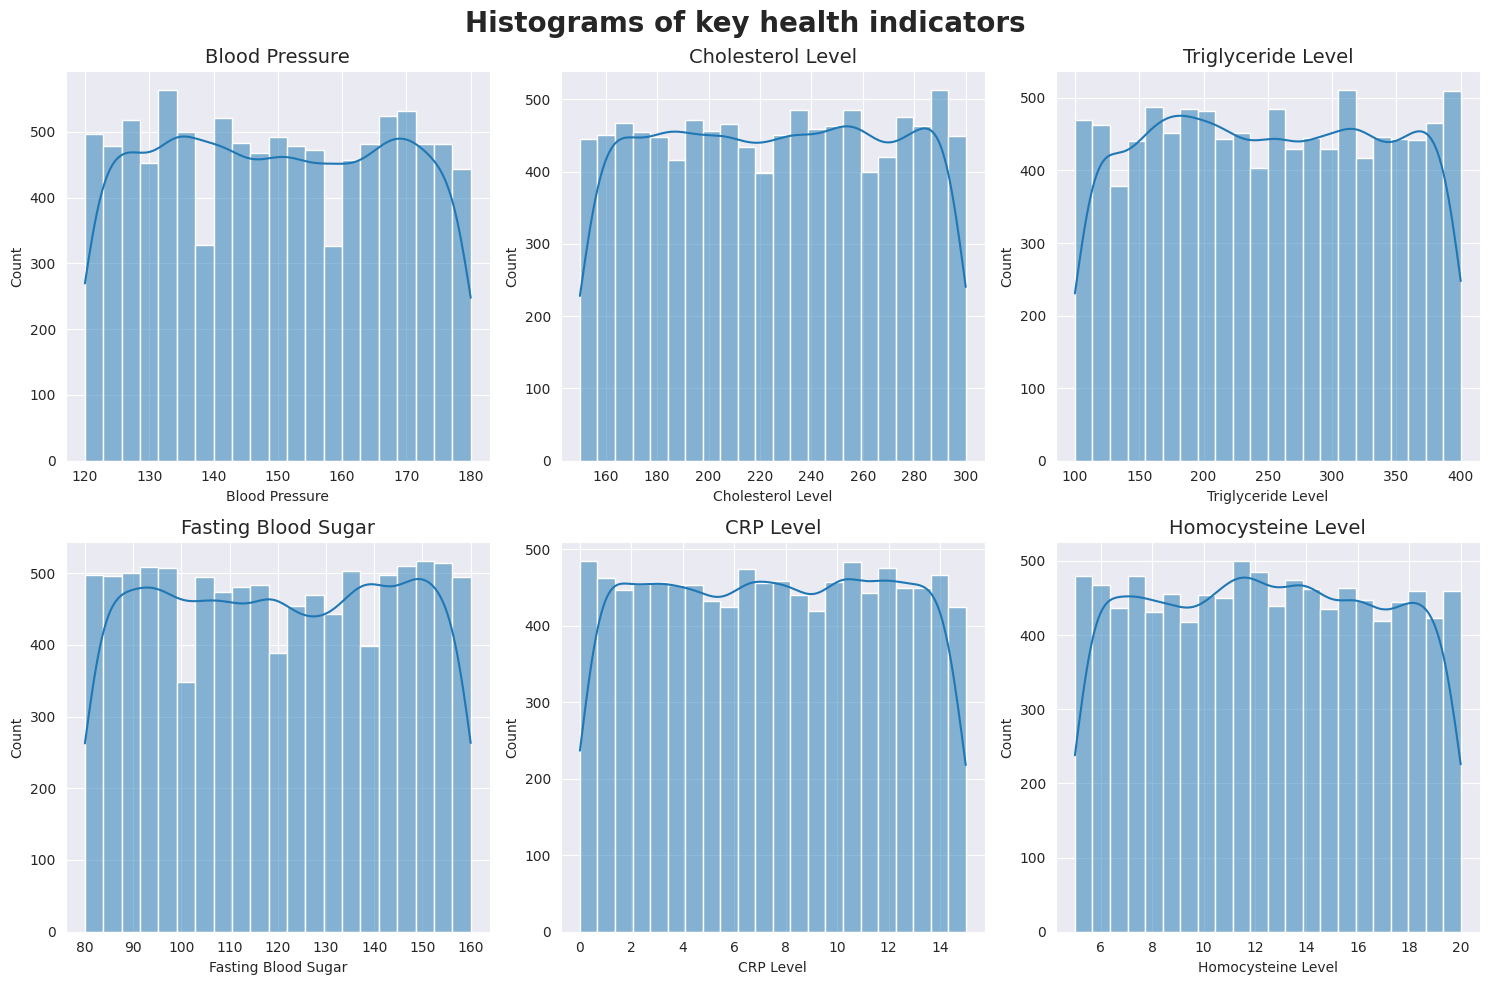

In [7]:
#Histograms of each attribute to check distribution and outliers.
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 10))
ax = ax.flatten()
sns.set_style('darkgrid')

for i, col in enumerate(columns_1):
    sns.histplot(df_1[col], kde=True, ax=ax[i])
    ax[i].set_title(col, fontsize=14)
fig.suptitle('Histograms of key health indicators', fontsize = 20, fontweight = 'bold')
plt.tight_layout()

**Insight**: Data is roughly evenly distributed across the above features.

<Axes: >

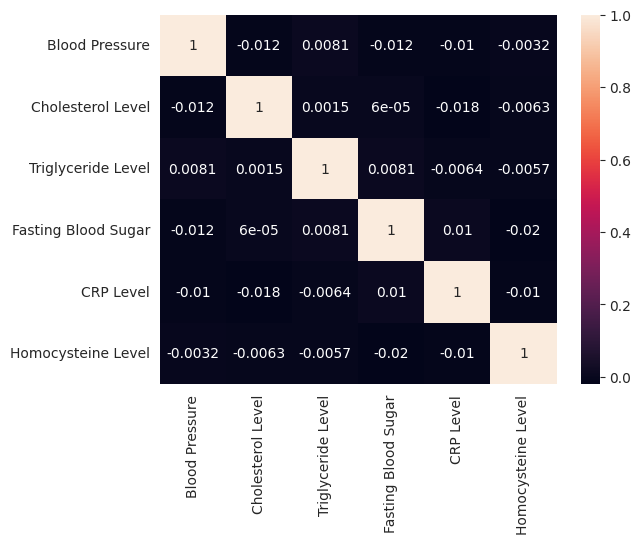

In [8]:
#Using heatmap to see relations between the attributes
sns.heatmap(df_1.corr(), annot=True)

**Insight**: No significant relationship between above features.

# 2.
Perform the necessary cleaning, in terms of missing and noisy data.
Summarize the data before and after cleaning.

In [9]:
#Summary of data before cleaning
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [10]:
#Check for outliers using IQR method
num_cols = df.select_dtypes(include=['number']).columns.tolist()
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)]
outliers_iqr

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status


**Insight**: No outliers are present in the data

In [11]:
na_cols = df.isna().sum()
na_cols = na_cols[na_cols > 0]
na_cols

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
dtype: int64

In [12]:
#Fill in categorical columns using mode, numeric columns using median
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Verify no missing values remain
df.isna().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

All missing values have been filled.

In [13]:
#Summary of data after cleaning
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.295400,149.758200,225.427300,29.077274,6.991359,250.732500,120.141900,7.472200,12.456177
std,18.167574,17.556268,43.510401,6.300156,1.751002,86.953962,23.558053,4.334601,4.319100
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.668887,5.455288,176.000000,99.000000,3.681800,8.729771
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.509009,8.527938,326.000000,141.000000,11.244879,16.130968
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


**Insight**: Values have changed, but not by much due to very few numeric NA values being filled.

## 3.
Perform exploratory data analysis using numpy, Pandas, Matplotlib and
Seaborn to address the following:

### a.) Distribution of attributes

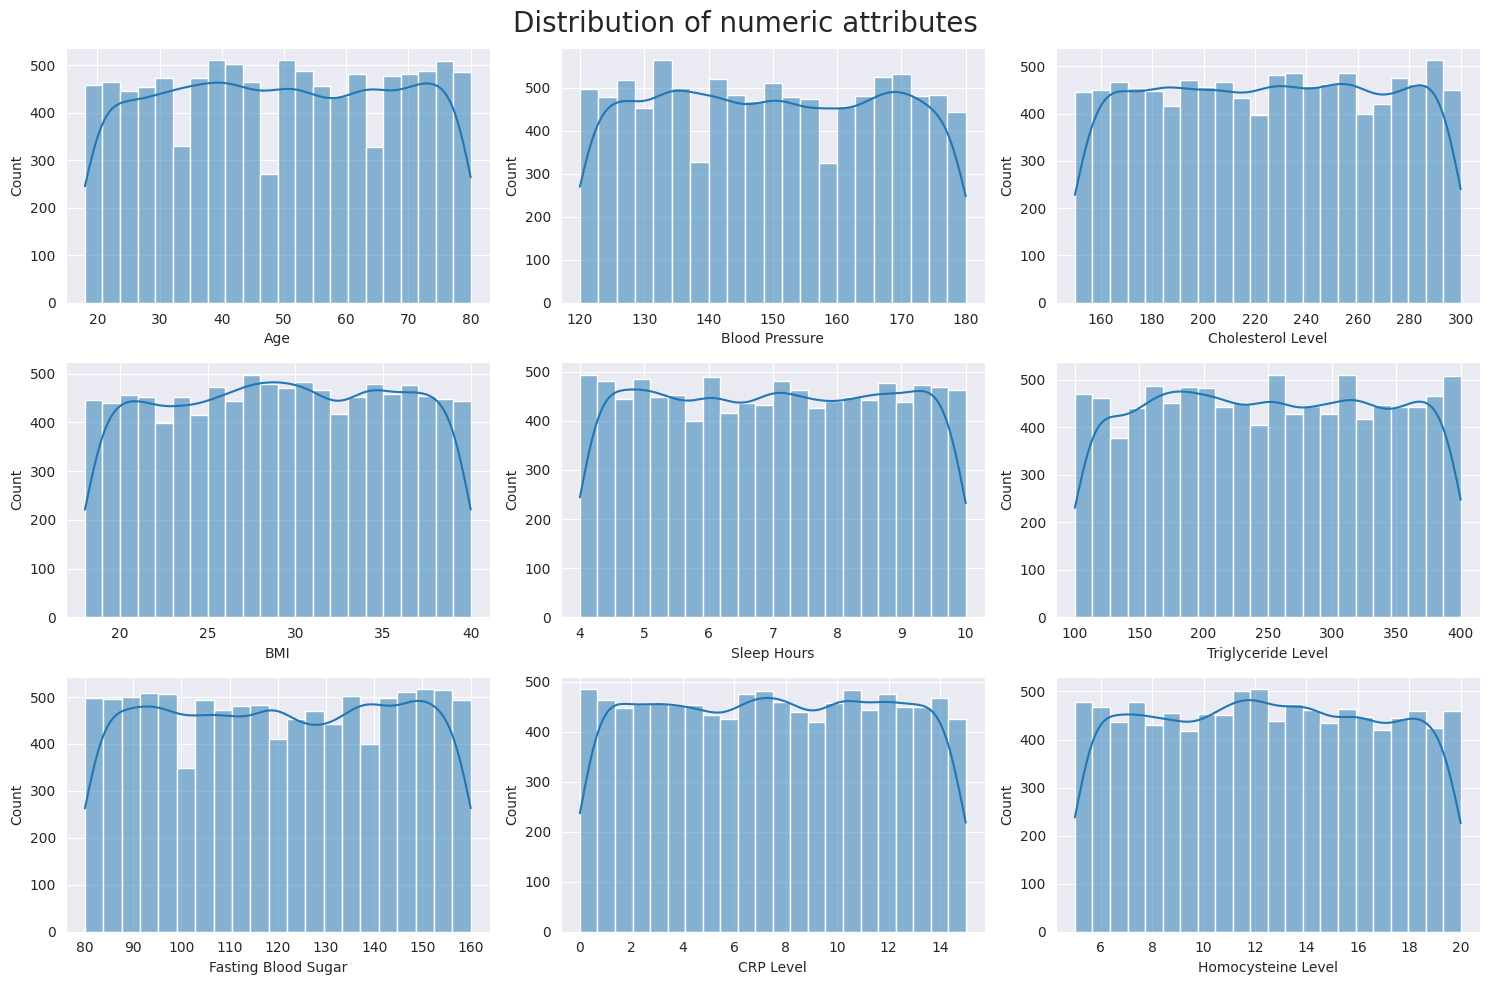

In [14]:
#Getting number of numeric and categorical columns
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(15, 10))
ax = ax.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(data = df, x = col, ax = ax[i], kde=True)

fig.suptitle('Distribution of numeric attributes', fontsize = 20)
plt.tight_layout()

**Insight**: Data is roughly evenly distributed across the above features.

In [15]:
#Checking data for skewness
skewness = df.skew(numeric_only=True)
print('Skewness:')
print(skewness)

Skewness:
Age                   -0.006657
Blood Pressure         0.013842
Cholesterol Level     -0.007250
BMI                   -0.021368
Sleep Hours            0.000121
Triglyceride Level     0.006216
Fasting Blood Sugar   -0.008885
CRP Level             -0.004074
Homocysteine Level     0.007959
dtype: float64


**Insight**: Numeric Data is not significantly skewed in any way.

In [16]:
for i in cat_cols:
    print(df[i].value_counts())
    print()

Gender
Male      5022
Female    4978
Name: count, dtype: int64

Exercise Habits
High      3397
Medium    3332
Low       3271
Name: count, dtype: int64

Smoking
Yes    5148
No     4852
Name: count, dtype: int64

Family Heart Disease
No     5025
Yes    4975
Name: count, dtype: int64

Diabetes
No     5048
Yes    4952
Name: count, dtype: int64

High Blood Pressure
Yes    5048
No     4952
Name: count, dtype: int64

Low HDL Cholesterol
Yes    5025
No     4975
Name: count, dtype: int64

High LDL Cholesterol
No     5062
Yes    4938
Name: count, dtype: int64

Alcohol Consumption
Medium    5086
Low       2488
High      2426
Name: count, dtype: int64

Stress Level
Medium    3409
Low       3320
High      3271
Name: count, dtype: int64

Sugar Consumption
Low       3420
High      3330
Medium    3250
Name: count, dtype: int64

Heart Disease Status
No     8000
Yes    2000
Name: count, dtype: int64



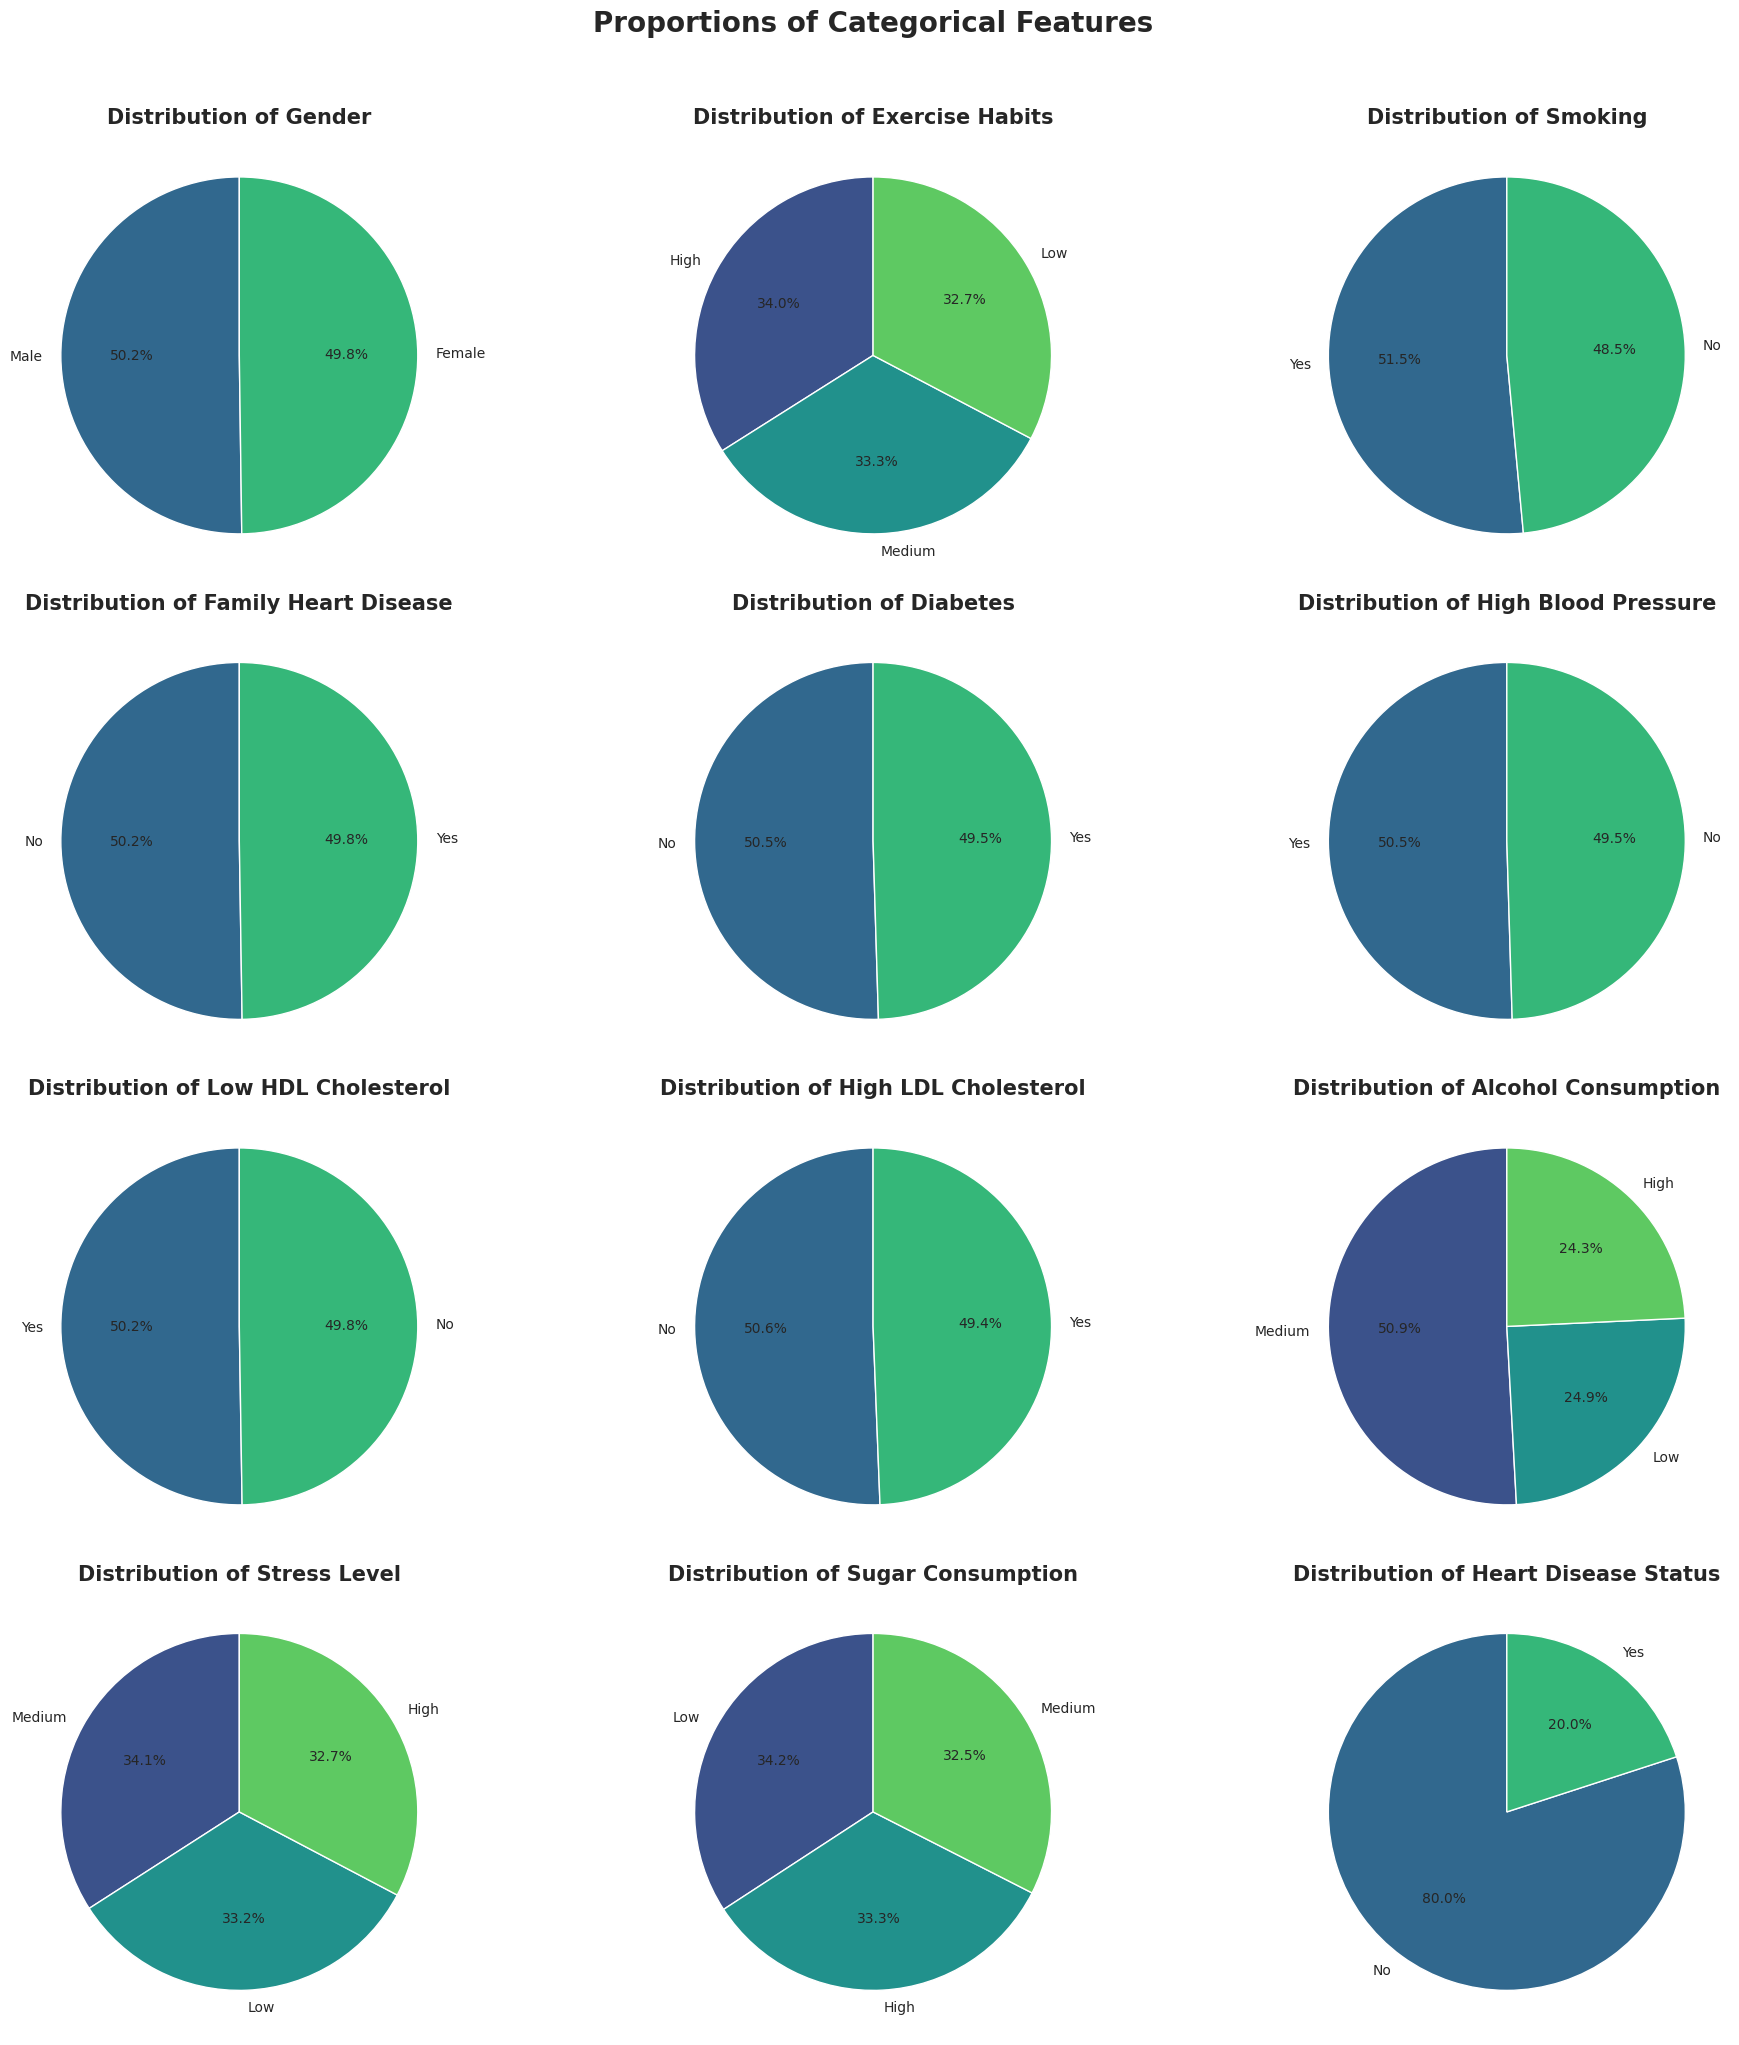

In [17]:
# Plotting categorical features as pie charts
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
ax = ax.flatten()

# Create subplots for each categorical feature
for i, col in enumerate(cat_cols):
    value_counts = df[col].value_counts()
    labels = value_counts.index
    sizes = value_counts.values
    
    ax[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(labels)))
    ax[i].set_title(f"Distribution of {col}", fontsize=15, fontweight='bold')

fig.suptitle('Proportions of Categorical Features', fontsize=20, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()


**Insight**: Almost all values are highly evenly distributed. The exceptions are Heart Disease Status and Alcohol Consumption, the latter due to filling of a large number of missing values with the mode.

### b.) Correlation among attributes

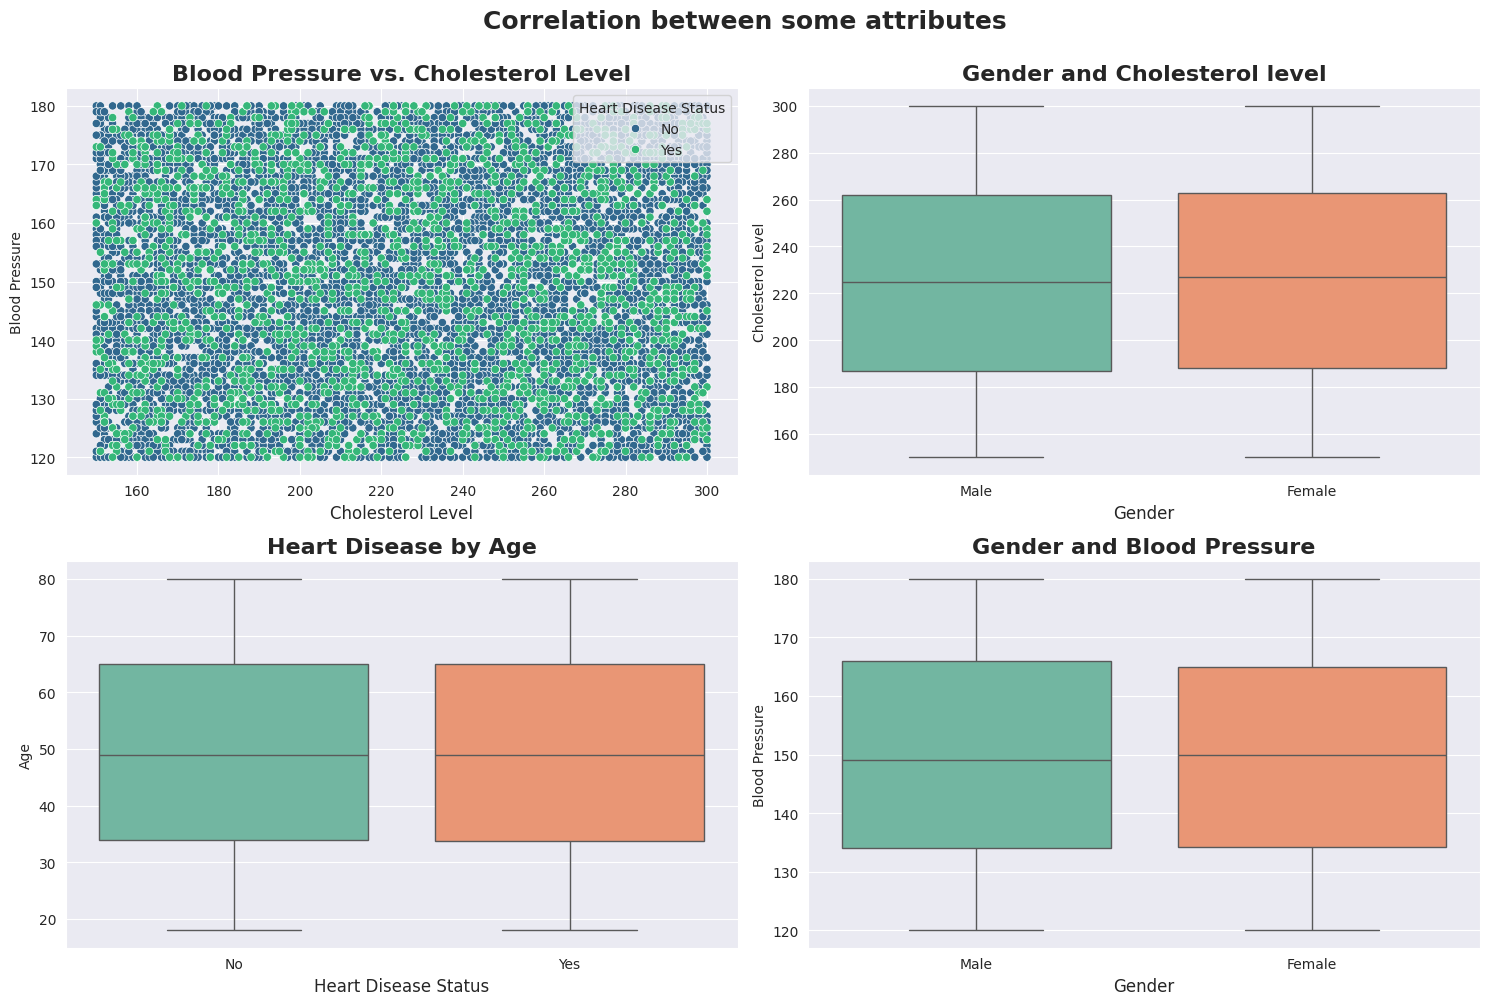

In [18]:
fig, ax = plt.subplots(nrows = 2, ncols =2, figsize = (15, 10))
ax = ax.flatten()

sns.scatterplot(data = df, x = 'Cholesterol Level', y = 'Blood Pressure', palette = 'viridis',
                hue='Heart Disease Status', ax = ax[0], legend='full')
ax[0].set_title('Blood Pressure vs. Cholesterol Level', fontsize = 16, fontweight = 'bold')
ax[0].set_xlabel('Cholesterol Level', fontsize = 12)

sns.boxplot(data = df, x='Gender', y= 'Cholesterol Level', palette= 'Set2', hue = 'Gender', ax= ax[1])
ax[1].set_title('Gender and Cholesterol level', fontsize = 16, fontweight = 'bold')
ax[1].set_xlabel('Gender', fontsize = 12)

sns.boxplot(data = df, x = 'Heart Disease Status', y = 'Age', palette = 'Set2',
            hue = 'Heart Disease Status', ax = ax[2])
ax[2].set_title('Heart Disease by Age', fontsize = 16, fontweight = 'bold')
ax[2].set_xlabel('Heart Disease Status', fontsize = 12)

sns.boxplot(data = df, x='Gender', y= 'Blood Pressure', palette= 'Set2', hue = 'Gender', ax= ax[3])
ax[3].set_title('Gender and Blood Pressure', fontsize = 16, fontweight = 'bold')
ax[3].set_xlabel('Gender', fontsize = 12)

fig.suptitle('Correlation between some attributes', fontsize=18, fontweight = 'bold', y = 1.001)

plt.tight_layout()
plt.show()

**Insight**: Analyzing these graphs one by one:
1. **Blood Pressure vs. Cholestrol Level**: Highly even scatter plot, no significant impact on sorting by heart disease status. Not much useful information, other than data is not correlated.
2. **Gender and Cholestrol Level**: Cholestrol level is roughly the same in both genders, the median being a tiny bit higher in females than males, but too small a delta to make any significant difference.
3. **Heart Disease by Age**: Both patients and non-patients of heart disease have almost identical median and variance in age, indicating that age alone does not determine heart disease in a significant way.
4. **Gender and Blood Pressure**: Blood Pressure is roughly equal in both genders, the median being only very slightly higher in females. This gap is too small to draw a meaningful conclusion.

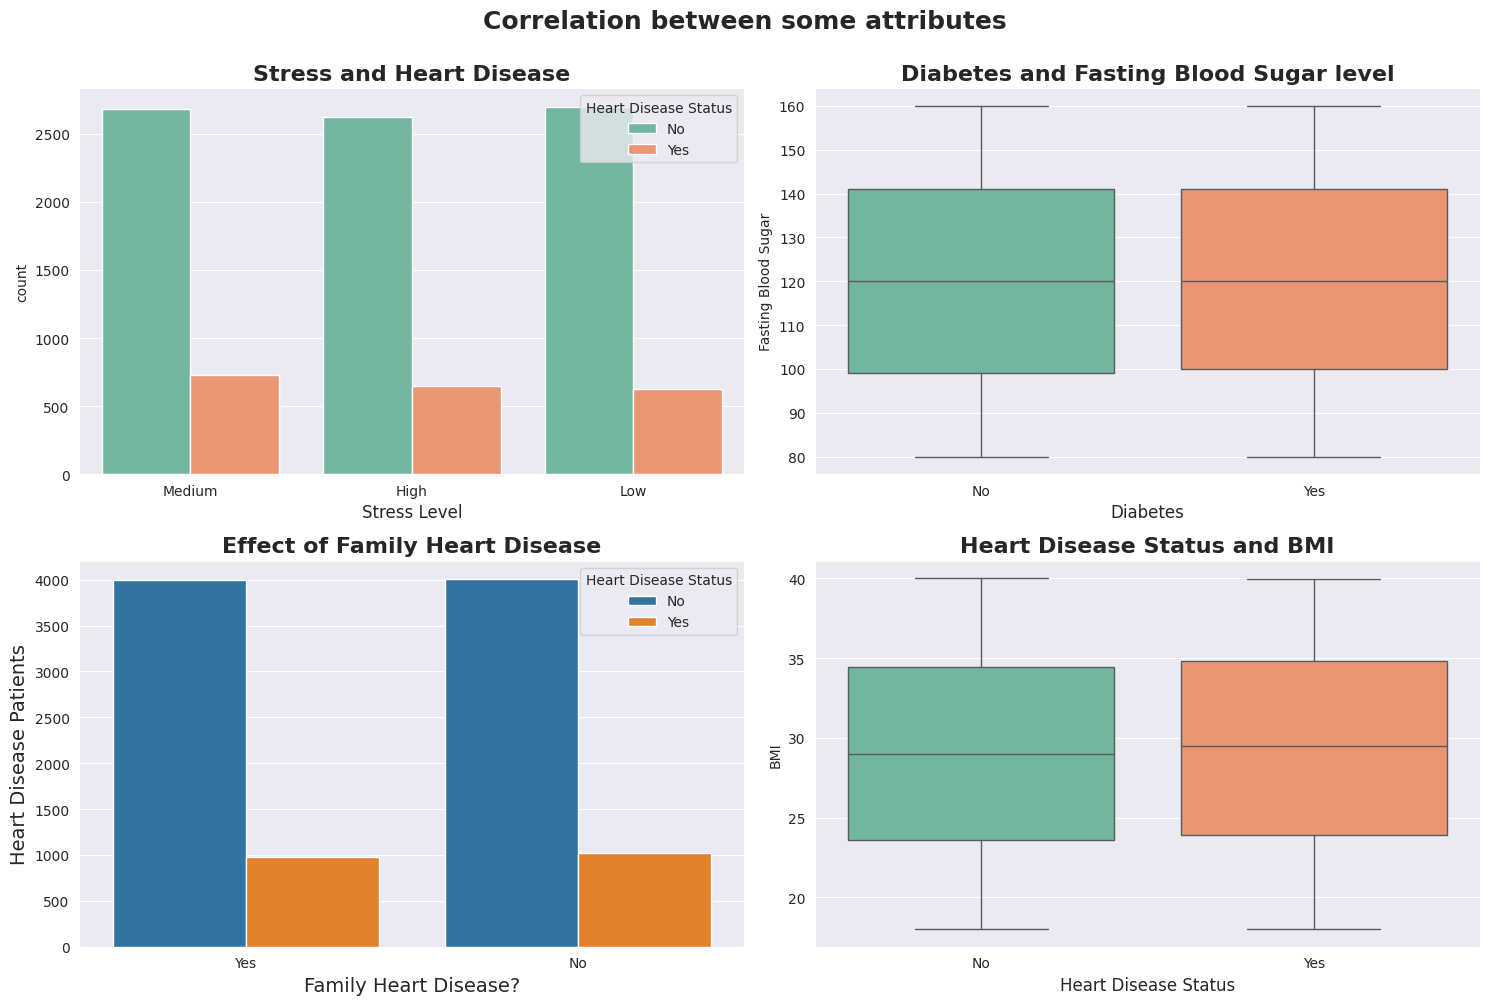

In [19]:
fig, ax = plt.subplots(nrows = 2, ncols =2, figsize = (15, 10))
ax = ax.flatten()

sns.countplot(data = df, x='Stress Level', palette= 'Set2', hue = 'Heart Disease Status', ax= ax[0])
ax[0].set_title('Stress and Heart Disease', fontsize = 16, fontweight = 'bold')
ax[0].set_xlabel('Stress Level', fontsize = 12)

sns.boxplot(data = df, x='Diabetes', y= 'Fasting Blood Sugar', palette= 'Set2', hue = 'Diabetes', ax= ax[1])
ax[1].set_title('Diabetes and Fasting Blood Sugar level', fontsize = 16, fontweight = 'bold')
ax[1].set_xlabel('Diabetes', fontsize = 12)

sns.countplot(data = df, x='Family Heart Disease', hue='Heart Disease Status', ax=ax[2])
ax[2].set_title('Effect of Family Heart Disease', fontsize = 16, fontweight = 'bold')
ax[2].set_xlabel('Family Heart Disease?', fontsize = 14)
ax[2].set_ylabel('Heart Disease Patients', fontsize=14)

sns.boxplot(data = df, x='Heart Disease Status', y= 'BMI', palette= 'Set2', hue = 'Heart Disease Status', ax= ax[3])
ax[3].set_title('Heart Disease Status and BMI', fontsize = 16, fontweight = 'bold')
ax[3].set_xlabel('Heart Disease Status', fontsize = 12)

fig.suptitle('Correlation between some attributes', fontsize=18, fontweight = 'bold', y = 1.001)

plt.tight_layout()
plt.show()

**Insight**: Comparing graphs one by one:
1. **Stress and Heart Disease**: The distributions are similar to each other, although low stress does correspond to the least no. of patients and highest no. of healthy people.
2. **Diabetes and Fasting Blood Sugar Level**: A truly stunning discovery based on this data is that there is no correlation between the fasting blood sugar level and diabetes in a patient.
3. **Effect of Family Heart Disease**: The graphs are nearly identical, indicating that the effect of having close relatives with heart disease does not impact one's own chances of heart disease.
4. **Heart Disease Status and BMI**: Overall, the median BMI for patients of heart disease is slightly higher than that of healthy patients, but by a tiny margin. *Note: The median BMI seems extremely high (above 25 is considered overweight), which raises questions about the data collection process.*

## c.) Analysing Feature Interactions

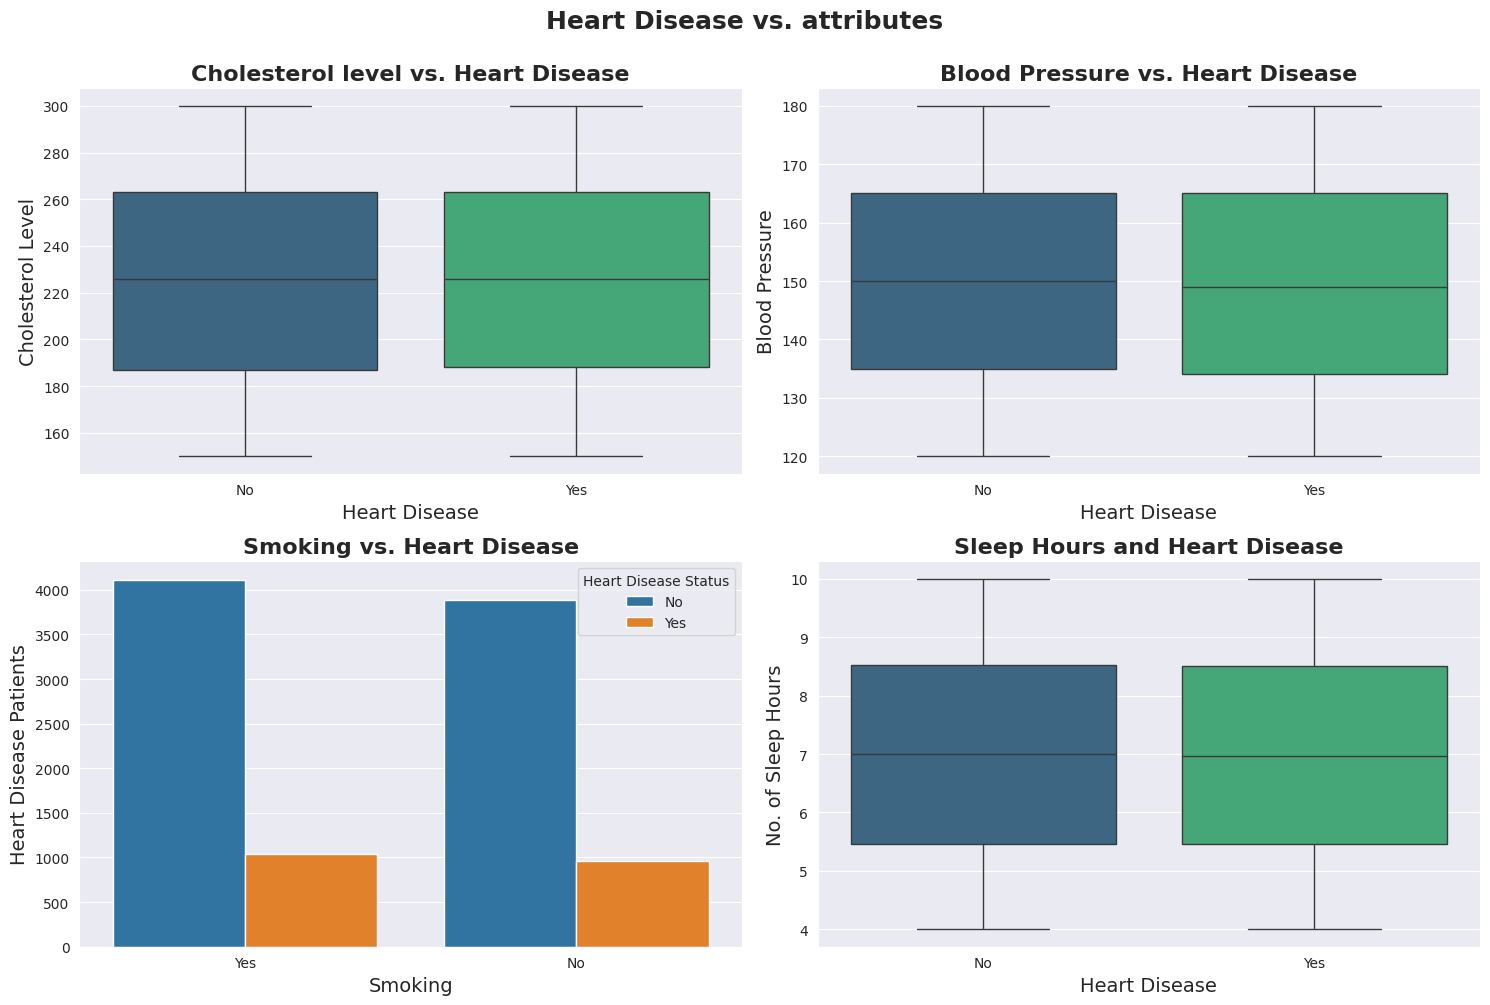

In [20]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
ax = ax.flatten()

sns.boxplot(data = df, x='Heart Disease Status', y='Cholesterol Level', ax = ax[0],
            palette = 'viridis', hue='Heart Disease Status')
ax[0].set_title('Cholesterol level vs. Heart Disease', fontsize = 16, fontweight = 'bold')
ax[0].set_xlabel('Heart Disease', fontsize = 14)
ax[0].set_ylabel('Cholesterol Level', fontsize=14)

sns.boxplot(data = df, x='Heart Disease Status', y='Blood Pressure', ax = ax[1],
            palette = 'viridis', hue='Heart Disease Status')
ax[1].set_title('Blood Pressure vs. Heart Disease', fontsize = 16, fontweight = 'bold')
ax[1].set_xlabel('Heart Disease', fontsize = 14)
ax[1].set_ylabel('Blood Pressure', fontsize=14)

sns.countplot(data = df, x='Smoking', hue='Heart Disease Status', ax=ax[2])
ax[2].set_title('Smoking vs. Heart Disease', fontsize = 16, fontweight = 'bold')
ax[2].set_xlabel('Smoking', fontsize = 14)
ax[2].set_ylabel('Heart Disease Patients', fontsize=14)

sns.boxplot(data = df, x='Heart Disease Status', y='Sleep Hours', ax = ax[3],
            palette = 'viridis', hue='Heart Disease Status')
ax[3].set_title('Sleep Hours and Heart Disease', fontsize = 16, fontweight = 'bold')
ax[3].set_xlabel('Heart Disease', fontsize = 14)
ax[3].set_ylabel('No. of Sleep Hours', fontsize=14)

fig.suptitle('Heart Disease vs. attributes', fontsize=18, fontweight = 'bold', y = 1.001)
plt.tight_layout()
plt.show()

**Insight**: Comparing graphs one by one:
1. **Cholestrol Level vs. Heart Disease**: Both patients and non-patients have similar distribution and identical medians of cholestrol level, indicating it alone does not play much of a role in heart disease.
2. **Blood Pressure vs. Heart Disease**: Both patients and non-patients have similar distribution and identical medians of blood pressure, indicating it alone does not play much of a role in heart disease. While median blood pressure of patients is slightly lower than that of non-patients, the difference is not significant enough.
3. **Smoking vs. Heart Disease**: There is apparently a greater number of smokers without heart disease than non-smokers without heart disease, and a roughly equal number of heart disease patients who smoke and those who do not.
4. **Sleep hours and Heart Disease**: Patients and non-patients of heart disease both seem to be getting identical sleep hours based on the median, suggesting this factor alone is not crucial in determining heart disease.

In [21]:
#Converting categorical columns to numeric
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female':1})
df['Exercise Habits'] = df['Exercise Habits'].replace({'High': 3, 'Medium':2, 'Low':1})
df['Alcohol Consumption'] = df['Alcohol Consumption'].replace({'High': 3, 'Medium':2, 'Low':1})
df['Stress Level'] = df['Stress Level'].replace({'High': 3, 'Medium':2, 'Low':1})
df['Sugar Consumption'] = df['Sugar Consumption'].replace({'High': 3, 'Medium':2, 'Low':1})
for col in ['Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
            'High LDL Cholesterol', 'Heart Disease Status']:
    df[col] = df[col].replace({'Yes': 1, 'No':0})

<Axes: >

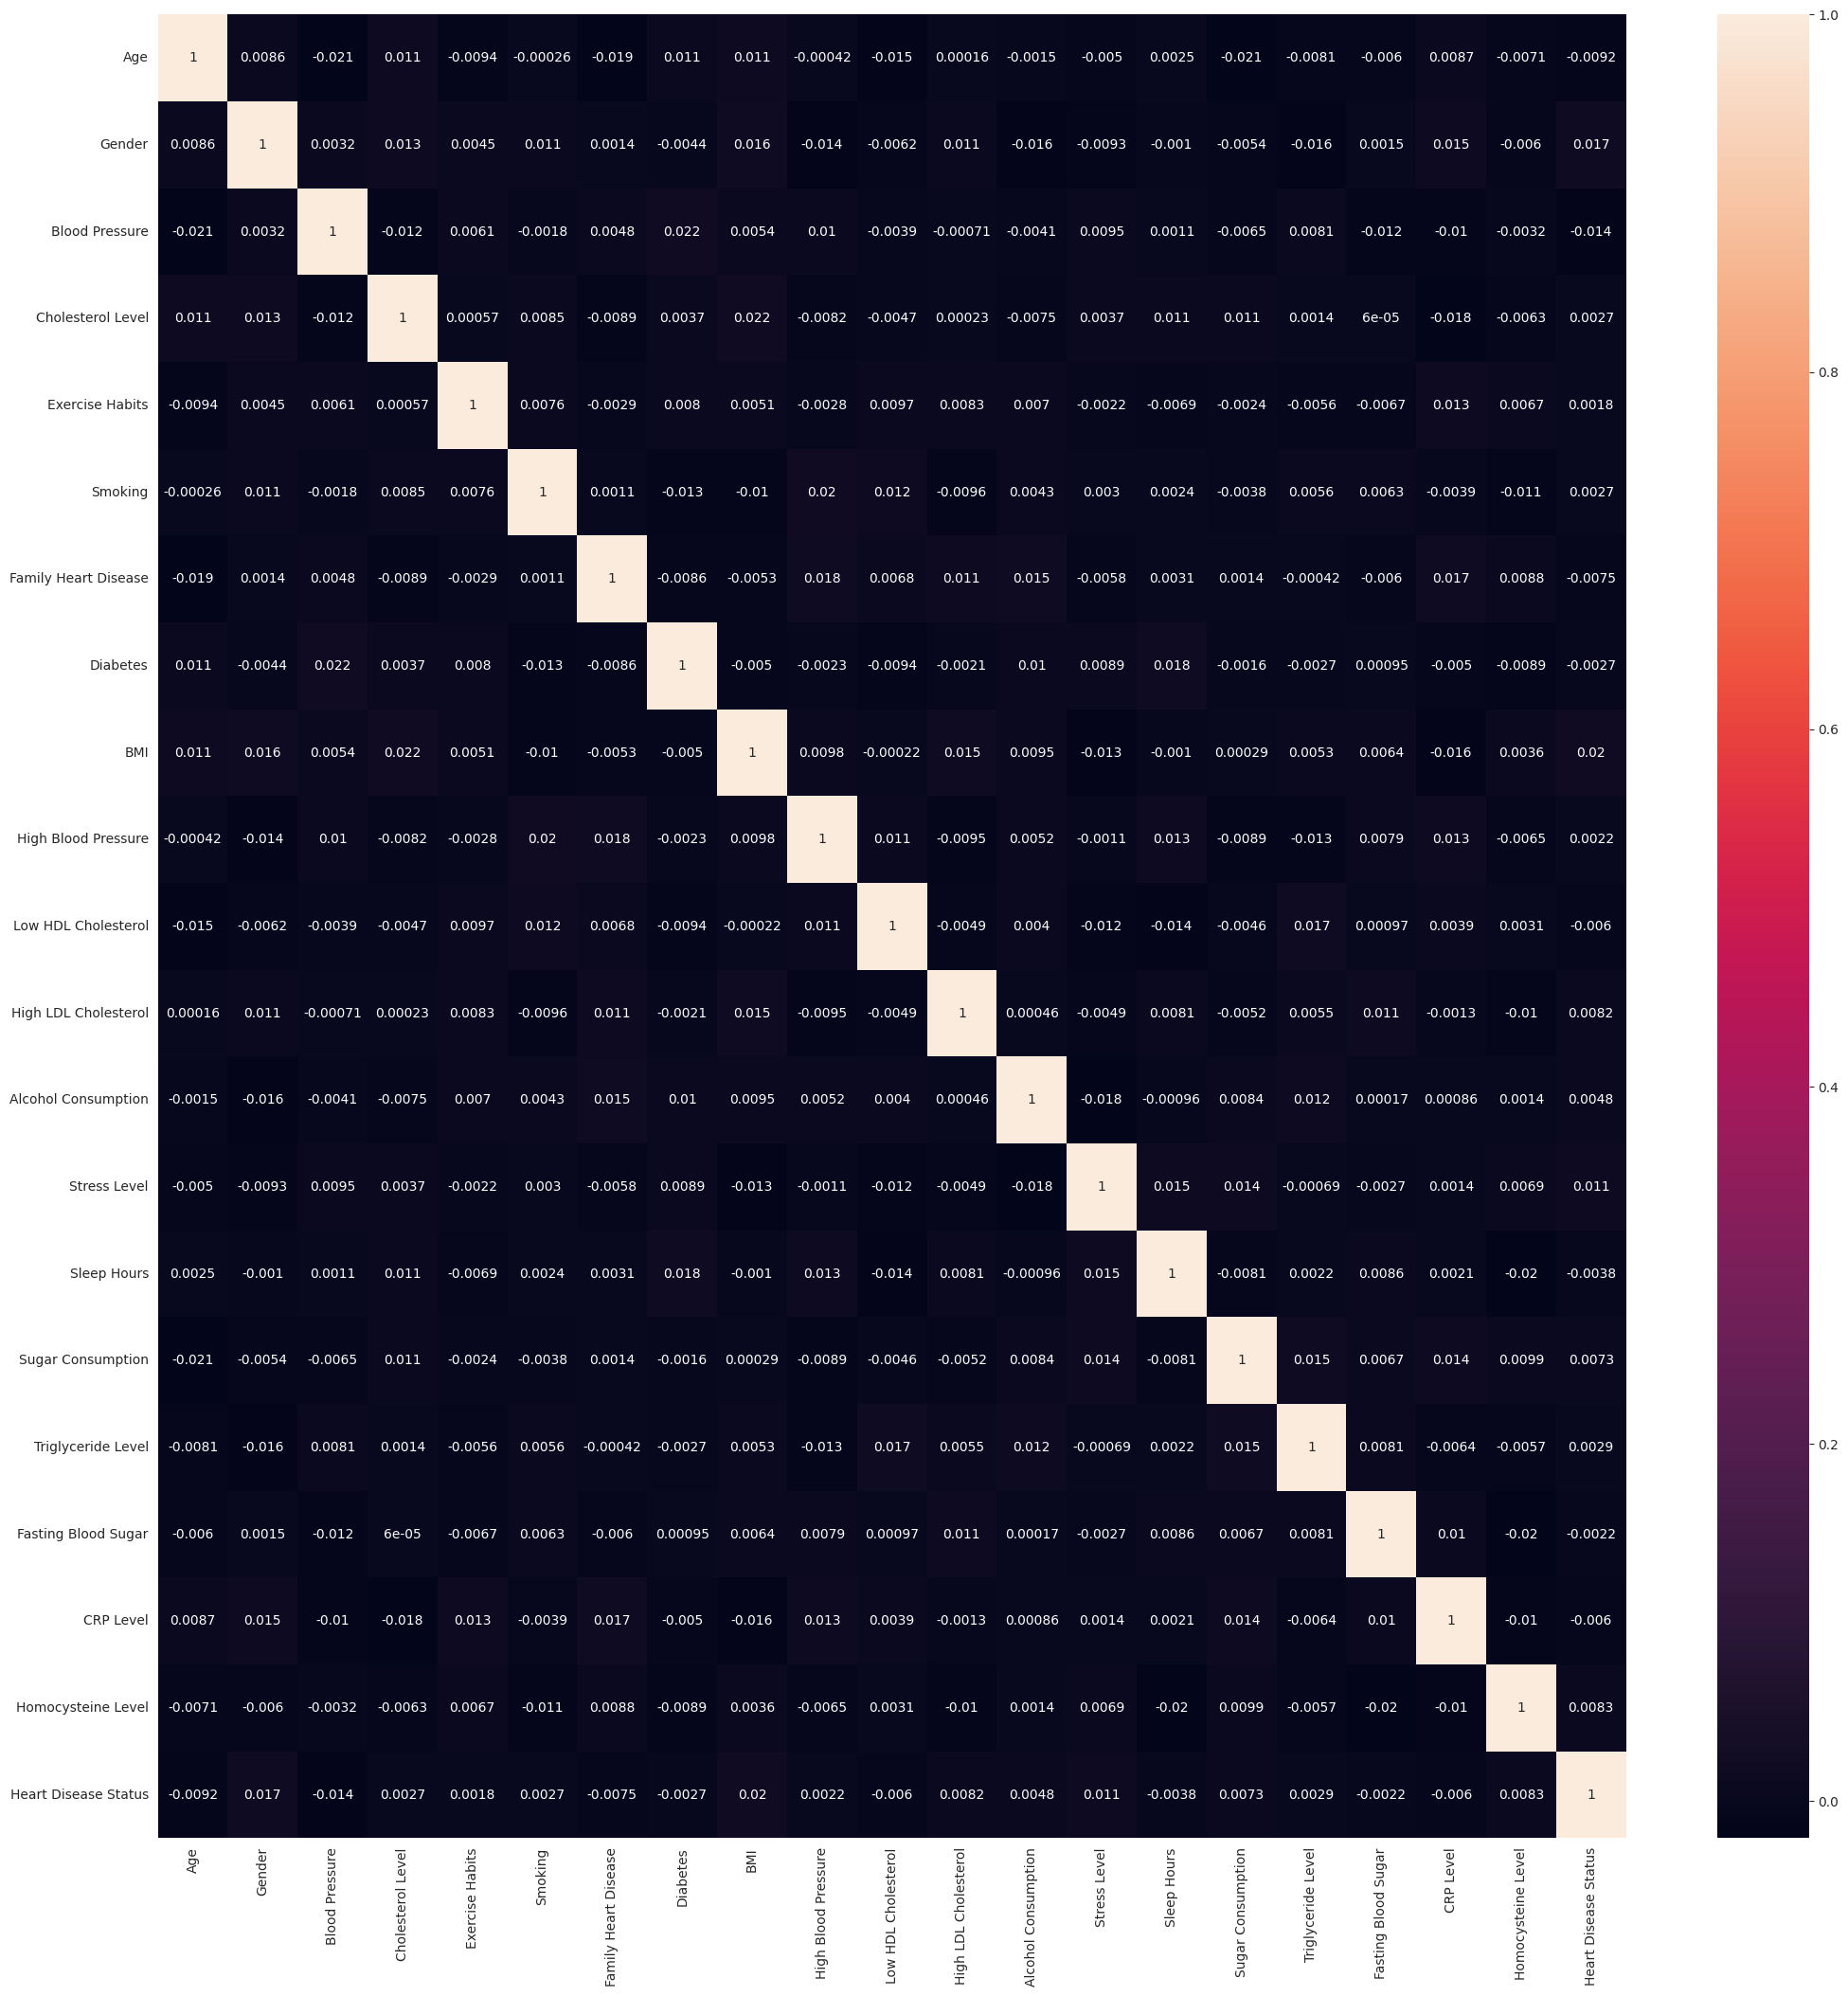

In [26]:
#Plot heatmap: Best way to check immediate correlation between any pair of features
plt.figure(figsize = (25, 25))
sns.heatmap(df.corr(), annot=True)

**Insight**: This heatmap clearly shows that no two distinct features have any significant correlation, suggesting that this data needs tweaking, has errors in collection, or needs far more thorough analysis using advanced techniques.